# Auswertung Versuch 233: Fourier-Optik

## Teil 1: Quantitative Beobachtungen am Einzelspalt

### Bestimmung der Spaltbreite

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['errorbar.capsize']=2
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

In [2]:
#Bestimmung der Abstände der Minima 
min_order=np.array([1,2,3,4,5])
min_pos_left=np.array([932.69,838.65,749.67,659.80,575.26]) #von der ersten bis zur fünften Ordnung 
min_pos_right=np.array([1109.38,1187.47,1275.56,1361.87,1447.30])

delta_min=np.abs(min_pos_left-min_pos_right)
delta_min_err=np.sqrt(2)*3*np.ones(5) #Fehler jeweils 3pxl

In [3]:
#Eichung der Pixelskala zum Umrechnen des Spaltabstands in Längeneinheiten 
dpx=np.array([387.04,546.71,723.74,897.30])
dpx_err=3*np.ones(4)
slit_aperture=np.array([0.88,1.26,1.70,2.12]) #direkt die Messwerte verdoppelt
slit_aperture_err=0.02*np.ones(4)

gauge=slit_aperture/dpx  #Faktor zur Umrechnung von Pixel in mm

gauge_mean=np.mean(gauge)
gauge_syst=np.mean(gauge*np.sqrt((slit_aperture_err/slit_aperture)**2+(dpx_err/dpx)**2))
gauge_stat=np.std(gauge)/np.sqrt(4)


print('Der Umrechnungsfaktor u wurde berechnet zu: ')
print(str(gauge_mean)+' +/- '+str(gauge_syst)+' +/- '+str(gauge_stat))

Der Umrechnungsfaktor u wurde berechnet zu: 
0.00232247886987 +/- 3.65626005345e-05 +/- 1.76965091658e-05


Die Steigung der Fit-Gerade beträgt:
a = 174.395001004 +/- 0.69221374115 pxl
Mit y-Achsenabschnitt:
c = 1.91699631127 +/- 2.29581438229 pxl


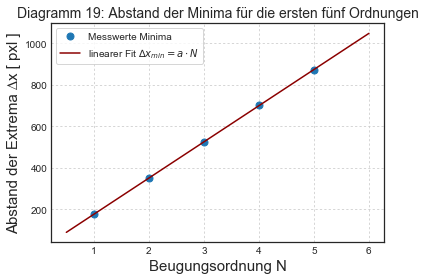

In [4]:
#Definition der linearen Fit-Funktion
def linear_fit(x,a,b):
    return a*x+b
popt,pcov=curve_fit(linear_fit,min_order,delta_min,sigma=delta_min_err)

x_fit=np.linspace(0.5,6,100) #Länge der Fit-Gerade


#Plot der Minima-Abstände mit lin.Fit
plt.plot(min_order,delta_min,linestyle='',marker='o',markersize=7,label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')

#Fehlerbalken nicht notwendig, da sie sowieso nicht sichtbar wären.

#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 19: Abstand der Minima für die ersten fünf Ordnungen',size=14)
plt.grid(ls='dotted')
plt.legend(frameon=True)


#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm19.pdf',format='PDF')

a=popt[0]
a_err=pcov[0,0]**0.5

print('Die Steigung der Fit-Gerade beträgt:')
print( 'a = ' + str(a) + ' +/- ' + str(a_err) + ' pxl')
print('Mit y-Achsenabschnitt:')
print('c = '+ str(popt[1])+ ' +/- ' + str(pcov[1,1]**0.5) + ' pxl')

In [5]:
#Umrechnung der Spaltbreite in mm
a_prime= gauge_mean*a

a_prime_syst=np.sqrt((gauge_syst)**2+(a_err*gauge_mean)**2)
a_prime_stat=np.sqrt((gauge_stat)**2+(a_err*gauge_mean)**2)

a_prime_mean=np.mean(a_prime)
a_prime_mean_syst=np.sqrt((gauge_mean*pcov[0,0]**0.5)**2+(popt[0]*gauge_syst)**2)
a_prime_mean_stat=np.sqrt((gauge_mean*pcov[0,0]**0.5)**2+(popt[0]*gauge_stat)**2)

print('Mit der Eichung der Skala erhalten wir die Steigung a in mm/order:')
print( 'a_prime = ' + str(a_prime_mean) + ' +/- ' + str(a_prime_mean_syst) + ' +/a- ' + str(a_prime_mean_stat)+ ' mm/order')



Mit der Eichung der Skala erhalten wir die Steigung a in mm/order:
a_prime = 0.405028704844 +/- 0.00657587934816 +/a- 0.00347980863484 mm/order


In [6]:
#Bestimmung der Spaltbreite aus der Steigung des Fits (Herleitung in Auswertung)
wavelength=635e-9
f1= 80e-3 

b=2*wavelength*f1/(a_prime_mean*1e-3)
b_syst=b*(a_prime_mean_syst/a_prime_mean)
b_stat=b*(a_prime_mean_stat/a_prime_mean)

print('Aus der Steigung von Diagramm 19 erhalten wir:')
print('b = '+str(b)+ ' +/- '+str(b_syst)+ ' +/- '+str(b_stat)+ ' m')

Aus der Steigung von Diagramm 19 erhalten wir:
b = 0.0002508464185 +/- 4.07263920618e-06 +/- 2.15514980216e-06 m


Die Differenz der jeweiligen Maxima beträgt:
∆max =      [ 247.58  428.9   610.42  775.05  957.46]
mit Fehler: [ 4.24264069  4.24264069  4.24264069  4.24264069  4.24264069]

Wir erhalten die den Maxima zugeordneten Beugungsordnungen aus dem Fit:
N =         [ 1.40865852  2.44836722  3.48922274  4.43322916  5.47918804]
mit Fehler: [ 0.02822066  0.02931868  0.03093465  0.03278384  0.035187  ]

Der Vergleich mit den theoretischen Werten (1.5,2.5,...) liefert:
∆N =        [ 0.09134148  0.05163278  0.01077726  0.06677084  0.02081196]
mit Fehler: [ 0.02822066  0.02931868  0.03093465  0.03278384  0.035187  ]


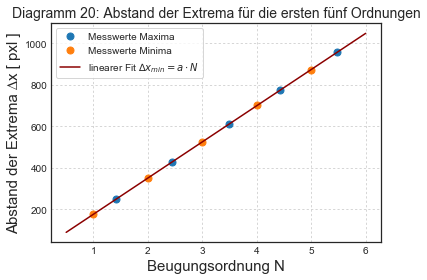

In [7]:
#Bestimmung der Abstände der Maxima
max_pos_left=np.array([889.78,799.50,709.63,625.09,532.55])
max_pos_right=np.array([1137.36,1228.40,1320.05,1400.14,1490.01])

#Abstände der jeweiligen Beugungsordnungen
delta_max=np.abs(max_pos_left-max_pos_right)
delta_max_err=np.sqrt(2)*3*np.ones(5)

print('Die Differenz der jeweiligen Maxima beträgt:')
print('∆max =      '+str(delta_max))
print('mit Fehler: '+str(delta_max_err))
print()

#Position der Maxima mit Hilfe von Diagramm 19
n_max_calc=(delta_max-popt[1])/popt[0]
n_max_calc_err=np.sqrt((delta_max_err/popt[0])**2+(pcov[1,1]**0.5/popt[0])**2+((delta_max-popt[1])*pcov[0,0]**0.5/popt[0]**2)**2)
n_max_theory=np.arange(1.5,6.5,1)
#Differenz Messwert-Theorie
diff_n_max=np.abs(n_max_theory-n_max_calc)

print('Wir erhalten die den Maxima zugeordneten Beugungsordnungen aus dem Fit:')
print('N =         ' + str(n_max_calc))
print ('mit Fehler: ' + str(n_max_calc_err))
print()

#Plot der Maxima-Abstände 
plt.plot(n_max_calc,delta_max,linestyle='',marker='o',markersize=7,label='Messwerte Maxima')
plt.plot(min_order,delta_min,linestyle='',marker='o',markersize=7,label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')


#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 20: Abstand der Extrema für die ersten fünf Ordnungen',size=14)
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm20.pdf',format='PDF')

print('Der Vergleich mit den theoretischen Werten (1.5,2.5,...) liefert:')
print('∆N =        ' + str(diff_n_max))
print ('mit Fehler: ' + str(n_max_calc_err))


In [8]:
#Bestimmung der Minimaordnung aus der Äquidistanzannahme

#Setze den Abstand der ersten Minima als Eichung fest und vergleiche die Differenzen der höheren Ordnungen damit
min_theo=[]
min_theo_err=[]
for i in range(1,6):
    min_theo.append(delta_min[i-1]/delta_min[0])
    min_theo_err.append(min_theo[i-1]*np.sqrt((delta_min_err[i-1]/delta_min[i-1])**2+(delta_min_err[0]/delta_min[0])**2))

print('Wir erhalten die den Minima zugeordneten Beugungsordnungen mittels der Äquidistanzannahme:')
print('N =     ' + str(min_theo))
print ('Fehler: ' + str(min_theo_err))

Wir erhalten die den Minima zugeordneten Beugungsordnungen mittels der Äquidistanzannahme:
N =     [1.0, 1.974192087837455, 2.9763427471843333, 3.973456335955627, 4.9354236232950344]
Fehler: [0.033957779161242853, 0.053138414911442368, 0.075393214505580092, 0.098384879291250976, 0.12091641434873591]


### Vergleich der relativen Intensitäten aus den beide Messreihen

In [9]:
#zunächst einmal muss das Verhältnis aus der ersten Messung bestimmt werden,da bei der zweiten das 0. Max. übersteuert
#für den Fehler der counts gilt allgemein:

intensity_err=10

#erste Messung
max0_intesity1=3779.50

max1_intensity_left1=448.33 
ug_left1=259.10

max1_intensity_right1=430.48
ug_right1=265.22

#Abziehen des Untergrunds durch Mittlung des linken und des rechten Untergrundes
max0_1_corr=(max0_intesity1-(ug_left1+ug_right1)/2)
max0_1_corr_err=max0_1_corr*np.sqrt((intensity_err/max0_intesity1)**2+(intensity_err/ug_left1)**2+(intensity_err/ug_right1)**2)

#Abziehen des linken Untergrunds
max1_left1_corr=max1_intensity_left1-ug_left1
max1_left1_corr_err=np.sqrt(2)*intensity_err

#Abziehen des rechten Untergrunds
max1_right1_corr=max1_intensity_right1-ug_right1
max1_right1_corr_err=np.sqrt(2)*intensity_err

#Verhältnis vom nullten zum ersten Maximum
prob_max1_max0_left =max1_left1_corr/max0_1_corr
prob_left_err =prob_max1_max0_left*np.sqrt((max1_left1_corr_err/max1_left1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

prob_max1_max0_right = max1_right1_corr/max0_1_corr
prob_right_err= prob_max1_max0_right*np.sqrt((max1_right1_corr_err/max1_right1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

print('Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_left) + ' +/- ' + str(prob_left_err))
print()
print('Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_right) + ' +/- ' + str(prob_right_err))
print()


Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:
0.053799177787760055 +/- 0.00496107862294

Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:
0.04698436886965718 +/- 0.00475478798884



In [10]:
#Ab hier werden die Messdaten der zweiten Messreihe verwendet
max_intensity_left2=np.array([3609.03,1599.67,1105.51,781.61,623.61])
ug_left2=397.31*np.ones(5)

max_intensity_left2_corr=max_intensity_left2-ug_left2
max_intensity_left2_corr_err=np.sqrt(2)*intensity_err*np.ones(5)

max_intensity_right2=np.array([3706.94,1696.92,958.20,745.08,620.04])
ug_right2=330.56*np.ones(5)

max_intensity_right2_corr=max_intensity_right2-ug_right2
max_intensity_right2_corr_err=np.sqrt(2)*intensity_err*np.ones(5)

#Jetzt können wir anhand des Ergebnisses die Werte für die zweite Messreihe durch Umrechnung bestimmen
max0_intesity2_left=(1/prob_max1_max0_left)*max_intensity_left2_corr[0]
max0_intesity2_left_err=max0_intesity2_left*np.sqrt((prob_left_err/prob_max1_max0_left)**2+(intensity_err/max_intensity_left2_corr[0])**2)

max0_intesity2_right=(1/prob_max1_max0_right)*max_intensity_right2_corr[0]
max0_intesity2_right_err=max0_intesity2_right*np.sqrt((prob_right_err/prob_max1_max0_right)**2+(intensity_err/max_intensity_right2_corr[0])**2)

max0_intensity2_tot=(max0_intesity2_left+max0_intesity2_right)/2
max0_intensity2_tot_err=np.sqrt((max0_intesity2_left_err/2)**2+(max0_intesity2_right_err/2)**2)

print('Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: ')
print('I_max0 = ' + str(max0_intensity2_tot) + ' +/- ' + str(max0_intensity2_tot_err))
print()

#Jetzt können wir das Verhältnis zum nullten Maximum trotz der Übersteuerung ausrechnen!
max0_2=max0_intensity2_tot*np.ones(5)

prob_max_max0_left=max_intensity_left2_corr/max0_intensity2_tot
prob_max_max0_left_err=prob_max_max0_left*np.sqrt((max_intensity_left2_corr_err/max_intensity_left2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

prob_max_max0_right=max_intensity_right2_corr/max0_intensity2_tot
prob_max_max0_right_err=prob_max_max0_right*np.sqrt((max_intensity_right2_corr_err/max_intensity_right2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

print('Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:')
print('linke Maxima: ' + str(prob_max_max0_left))
print('Fehler links: ' + str(prob_max_max0_left_err))
print()
print('rechte Maxima: ' + str(prob_max_max0_right))
print('Fehler rechts: ' + str(prob_max_max0_right_err))


Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: 
I_max0 = 65780.0410272 +/- 4562.69915072

Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:
linke Maxima: [ 0.04882514  0.01827849  0.01076618  0.0058422   0.00344025]
Fehler links: [ 0.00339347  0.00128595  0.00077711  0.00045873  0.00032119]

rechte Maxima: [ 0.05132834  0.02077165  0.0095415   0.00630161  0.00440073]
Fehler rechts: [ 0.00356677  0.00145674  0.00069587  0.00048711  0.00037336]


### Berechung der theoretischen Intensitätsverhältnisse

Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:
[ 0.04719045  0.01648003  0.00834029  0.00502872  0.00336073]


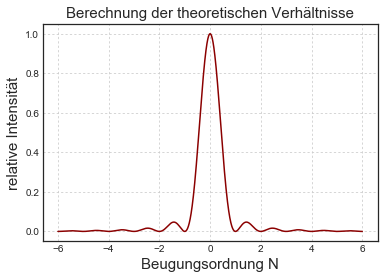

In [11]:
def beugung_spalt(x):
    return np.sinc(x)**2
a=5
#kleinere Schrittweite für präzisere Berechnung der Maxima, ungerade Anzahl damit nur einmal das nullte berechnet wird
x=np.linspace(-(a+1),a+1,200001)

#Berechnung der relativen Maxima
slit_theory=argrelextrema(beugung_spalt(x), np.greater_equal, order = 1) 
max_theory=np.array(beugung_spalt(x[slit_theory]))
max_theory_sliced=max_theory[4::-1]

print('Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:')
print(max_theory_sliced)

plt.plot(x,beugung_spalt(x),color='darkred')
plt.title('Berechnung der theoretischen Verhältnisse',size=15)
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('relative Intensität',size=15)
plt.grid(ls='dotted')


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [12]:
#Wir gehen bei den Theorie-Werten von einer fehlerfreien Bestimmung aus

#linke Seite
diff_max_theory_left=np.abs(max_theory_sliced-prob_max_max0_left)

#rechte Seite 
diff_max_theory_right=np.abs(max_theory_sliced-prob_max_max0_right)

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_theory_left)
print('mit Fehler:')
print(prob_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_theory_right)
print('mit Fehler:')
print(prob_max_max0_right_err)
print()
print('Die Werte liegen somit alle mindestens im 3-Sigma Intervall.')

Der Vergleich liefert für die linke Seite:
[  1.63469528e-03   1.79846675e-03   2.42589095e-03   8.13478943e-04
   7.95233842e-05]
mit Fehler:
[ 0.00339347  0.00128595  0.00077711  0.00045873  0.00032119]

Der Vergleich liefert für die rechte Seite:
[ 0.00413789  0.00429162  0.0012012   0.00127289  0.00104   ]
mit Fehler:
[ 0.00356677  0.00145674  0.00069587  0.00048711  0.00037336]

Die Werte liegen somit alle mindestens im 3-Sigma Intervall.


## Teil 2: Beugungsstruktur des Doppelspaltes

In [13]:
#Berechnung des Verhältnisses von Spaltabstand & Spaltbreite aus Teilaufgabe 4

#Positionen der Ränder
pos_err= 3 #pxl
#links
x1_1= 898.88
x1_2= 1041.85
#rechts
x2_1= 1233.41
x2_2= 1374.70

width_left=np.abs(x1_1-x1_2)
width_right=np.abs(x2_1-x2_2)

width_err=np.sqrt(2)*pos_err

width_mean=(width_left+width_right)/2
width_mean_err=np.sqrt((width_err/2)**2+(width_err/2)**2)


print('Die Spaltbreite d der beiden einzelnen Spalte beträgt(gemittelt):')
print('d = '+str(width_mean)+' +/- '+str(width_mean_err)+' pxl')
print()

#Berechnung des Spaltabstandes aus Mittelpunkten der Spalte

mid_left =(x1_1+x1_2)/2
mid_left_err = np.sqrt((pos_err/2)**2+(pos_err/2)**2)

mid_right =(x2_1+x2_2)/2
mid_right_err = np.sqrt((pos_err/2)**2+(pos_err/2)**2)

diff_mid = np.abs(mid_right-mid_left)
diff_mid_err = np.sqrt(mid_left_err**2+mid_right_err**2)

print('Der Spaltabstand g des Doppelspalts beträgt: ')
print('g = '+str(diff_mid)+' +/- '+ str(diff_mid_err)+ ' pxl')
print()

#Verhältnis des Spaltabstands zur Spaltbreite

prob_gd = diff_mid/width_mean
prob_gd_err = prob_gd*np.sqrt((diff_mid_err/diff_mid)**2+(width_mean_err/width_mean)**2)

print('Demnach ergibt sich für das Verhältnis v aus Spaltabstand und Spaltbreite:')
print('v = '+str(prob_gd)+' +/- '+str(prob_gd_err))


Die Spaltbreite d der beiden einzelnen Spalte beträgt(gemittelt):
d = 142.13 +/- 3.0 pxl

Der Spaltabstand g des Doppelspalts beträgt: 
g = 333.69 +/- 3.0 pxl

Demnach ergibt sich für das Verhältnis v aus Spaltabstand und Spaltbreite:
v = 2.34778020122 +/- 0.053863564646


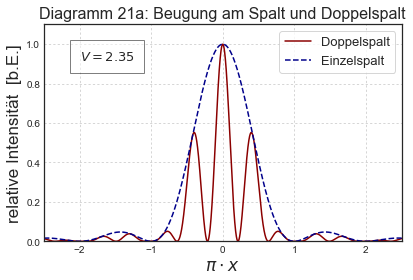

In [14]:
#Bestimmung der Beugungsfunktion des Doppelspalts (Theorie)
v=prob_gd
#Randwerte des 1-Sigma_intervalls
v2=prob_gd-prob_gd_err
v3=prob_gd+prob_gd_err

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#zum Vergleich soll noch das Bild des zugehörigen Einzelspalt ins Diagramm geplottet werden.

plt.plot(x,beugung_doppelspalt(x),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Diagramm 21a: Beugung am Spalt und Doppelspalt',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.text(-2,0.92,r'$V = 2.35$',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=13)
plt.legend(frameon=True,fontsize=13)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm21a.pdf',format='PDF')




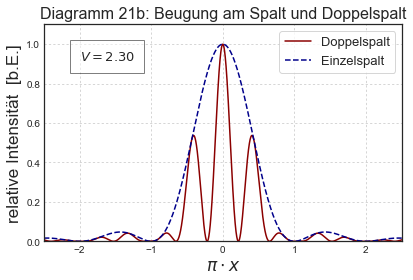

In [15]:
#erster Vergleichsplot
def beugung_doppelspalt2(x):
    return np.sinc(x)**2*np.cos(np.pi*v2*x)**2
plt.plot(x,beugung_doppelspalt2(x),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Diagramm 21b: Beugung am Spalt und Doppelspalt',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.text(-2,0.92,r'$V = 2.30$',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=13)
plt.legend(frameon=True,fontsize=13)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm21b.pdf',format='PDF')

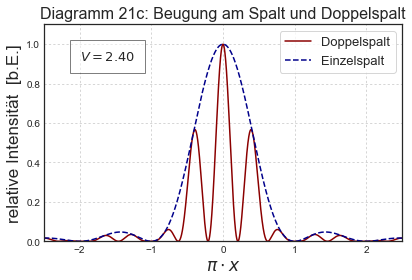

In [16]:
def beugung_doppelspalt3(x):
    return np.sinc(x)**2*np.cos(np.pi*v3*x)**2
plt.plot(x,beugung_doppelspalt3(x),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Diagramm 21c: Beugung am Spalt und Doppelspalt',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.text(-2,0.92,r'$V = 2.40$',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=13)
plt.legend(frameon=True,fontsize=13)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm21c.pdf',format='PDF')

### Vergleich der Theorie-Kurve mit unseren Messwerten

In [17]:
#Wir berechnen auch hier die Verhältnisse der Intensitätem der jeweiligen Maxima mit dem Hauptmaximum

#Messwerte 
max2_0= 3886.76
max2_0_corr=max2_0-((252.39+266.76)/2)
#Fehler=intensity_err=10 counts
max2_left=np.array([2407.25,527.99,380.09,398.50]) #vom 1. bis zum 4. Nebenmaximum
ug_left2=252.39*np.ones(4)

corr_err=np.sqrt(2)*intensity_err #Fehler der Differenz

max2_left_corr=max2_left-ug_left2


max2_right=np.array([2475.86,563.42,373.32,411.57]) #vom 1. bis zum 4. Nebenmaximum
ug_right2=266.76*np.ones(4)

max2_right_corr=max2_right-ug_right2

prob2_max_max0_left=max2_left_corr/max2_0_corr
prob2_max_max0_left_err=prob2_max_max0_left*np.sqrt((corr_err/max2_left_corr)**2+(intensity_err/max2_0_corr)**2)

prob2_max_max0_right=max2_right_corr/max2_0_corr
prob2_max_max0_right_err=prob2_max_max0_right*np.sqrt((corr_err/max2_right_corr)**2+(intensity_err/max2_0_corr)**2)

print('Der Vergleich der Intensitäten unserer Messungen liefert die nochfolgenden Verhältnisse:')
print('linke Seite: '+str(prob2_max_max0_left))
print('mit Fehler:  '+str(prob2_max_max0_left_err))
print()
print('rechte Seite: '+str(prob2_max_max0_right))
print('mit Fehler:   '+str(prob2_max_max0_right_err))
print()

#Theorie-Kurven
#21a
doubleslit_theory_a = argrelextrema(beugung_doppelspalt(x), np.greater_equal, order = 2000) 
max2_theory_a=np.array(beugung_doppelspalt(x[doubleslit_theory_a]))
max2_theory_sliced_a=max2_theory_a[14:10:-1]
#21b
doubleslit_theory_b = argrelextrema(beugung_doppelspalt2(x), np.greater_equal, order = 2000) 
max2_theory_b=np.array(beugung_doppelspalt2(x[doubleslit_theory_b]))
max2_theory_sliced_b=max2_theory_b[12:8:-1]
#21c
doubleslit_theory_c = argrelextrema(beugung_doppelspalt3(x), np.greater_equal, order = 2000) 
max2_theory_c=np.array(beugung_doppelspalt3(x[doubleslit_theory_c]))
max2_theory_sliced_c=max2_theory_c[14:10:-1]



Der Vergleich der Intensitäten unserer Messungen liefert die nochfolgenden Verhältnisse:
linke Seite: [ 0.59408605  0.07598179  0.03520637  0.04028193]
mit Fehler:  [ 0.00422898  0.00390455  0.00390014  0.00390051]

rechte Seite: [ 0.60903979  0.08178794  0.02937815  0.03992352]
mit Fehler:   [ 0.00424512  0.00390544  0.00389977  0.00390048]



In [18]:
print('Die Theorie-Werte für 21a sind: '+str(max2_theory_sliced_a))
print()
print('Die Theorie-Werte für 21b sind: '+str(max2_theory_sliced_b))
print()
print('Die Theorie-Werte für 21c sind: '+str(max2_theory_sliced_c))

Die Theorie-Werte für 21a sind: [ 0.55210621  0.05066628  0.03824465  0.02540414]

Die Theorie-Werte für 21b sind: [ 0.53688046  0.04220924  0.04136254  0.02081833]

Die Theorie-Werte für 21c sind: [ 0.56672511  0.05981872  0.03476095  0.02987126]


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [19]:
#Wir gehen bei den Theorie-Werten erneut von einer fehlerfreien Bestimmung aus.
#Es wird Diagramm 21c verwendet, da es am besten zu unseren werten passt.

#linke Seite
diff2_max_theory_left=np.abs(prob2_max_max0_left-max2_theory_sliced_c)

#rechte Seite 
diff2_max_theory_right=np.abs(prob2_max_max0_right-max2_theory_sliced_c)

print('Der Vergleich liefert für die linke Seite:')
print(diff2_max_theory_left)
print('mit Fehler:')
print(prob2_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff2_max_theory_right)
print('mit Fehler:')
print(prob2_max_max0_right_err)
print()
print('Damit sind einige Wertepaare signifikant verschieden!')

Der Vergleich liefert für die linke Seite:
[ 0.02736094  0.01616307  0.00044542  0.01041067]
mit Fehler:
[ 0.00422898  0.00390455  0.00390014  0.00390051]

Der Vergleich liefert für die rechte Seite:
[ 0.04231468  0.02196923  0.00538279  0.01005226]
mit Fehler:
[ 0.00424512  0.00390544  0.00389977  0.00390048]

Damit sind einige Wertepaare signifikant verschieden!


### Vergleich der relativen Intensitäten der Nebenmaxima zwischen dem ersten Minimum der Spaltfunktion

In [20]:
#Das betrifft jeweils die ersten beiden Nebenmaxima. Die Daten werden aus dem vorherigen Code übernommen.


#Differenzbildung
diff_max_under_single_left=np.abs(max2_theory_c[14:12:-1]-prob2_max_max0_left[0:2])
diff_max_under_single_right=np.abs(max2_theory_c[14:12:-1]-prob2_max_max0_right[0:2])

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_under_single_left)
print('mit Fehler:')
print(prob2_max_max0_left_err[0:2])
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_under_single_right)
print('mit Fehler:')
print(prob2_max_max0_right_err[0:2])
print()
print('Damit sind 3 von 4 Wertepaaren signifikant verschieden!')


Der Vergleich liefert für die linke Seite:
[ 0.02736094  0.01616307]
mit Fehler:
[ 0.00422898  0.00390455]

Der Vergleich liefert für die rechte Seite:
[ 0.04231468  0.02196923]
mit Fehler:
[ 0.00424512  0.00390544]

Damit sind 3 von 4 Wertepaaren signifikant verschieden!


## Teil 3: Das Objektbild als Fouriersynthese

In [21]:
# Integrand zu Formel 57, Einzelspalt
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Integrand zu 57, Doppelspalt
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Funktion zur berechnung und zum plot des resultierenden Objektbildes

d = b #bestimmt aus Messung mit n=15
def picture(
           function, # Integrand
           b,        # Integrationsbereich bezüglich der Nullstellen
           dateiname,
           speichername):
    
    # Definieren der Funktionsvariable
    global n
    global g
    g = 2*d
    n = b
    
    if function == spalt:
        y = np.linspace(-d, d, 301)
    else:
        y = np.linspace(-g, g, 501)
    
    # Berechnung des Objektbiles
    f_mod = []
    for i in range(len(y)): # numerische Inegration
        global yi 
        yi = y[i]
        result, error = quad(function, 0, 2*np.pi*n/d)
        f_mod.append(result**2)
    f_mod = f_mod/np.max(f_mod)
    
    # Lage der Maxima
    max1 = argrelextrema(f_mod, np.greater_equal, order = 1)
    f_max1 = f_mod[max1]
    y_max1 = y[max1]
    max2 = (f_max1 > 0.05)
    f_max = f_max1[max2]
    y_max = y_max1[max2]
    
    # Lage der Minima
    min1 = argrelextrema(f_mod, np.less_equal, order = 1)
    f_min1 = f_mod[min1]
    y_min1 = y[min1]
    min2 = (f_min1 > 0.05)
    f_min = f_min1[min2]
    y_min = y_min1[min2]
    
    # Plot
    plt.figure(dateiname)
    plt.plot(y, f_mod, color = 'darkgreen', linewidth = 0.8)
    plt.plot(y_max, f_max, linestyle ='', marker = 'x', color = 'darkblue', label = 'Maxima')
    plt.plot(y_min, f_min, linestyle ='', marker = 'x', color = 'darkred', label = 'Minima')
    plt.xlabel('y / d',size=15)
    plt.ylabel('rel. Intensität [b. E.]',size=15)
    plt.title('Diagramm %s' %dateiname,size=13)
    plt.ylim((0, 1.1))
    plt.savefig('Diagramme/%s.pdf' %speichername)
    
    # Ausgabe der Lage der Maxima und Minima
    return y_max, f_max, y_min, f_min
    

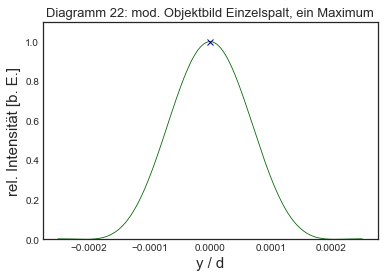

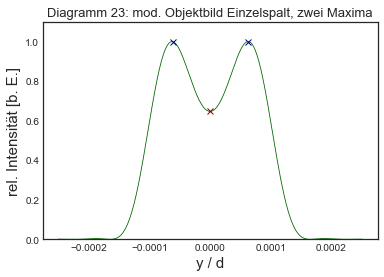

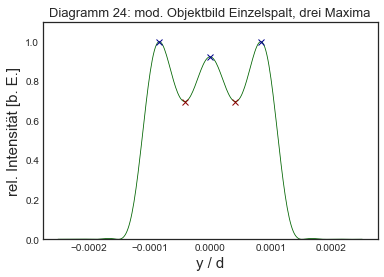

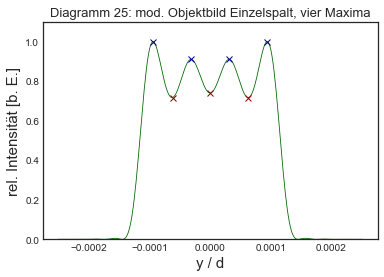

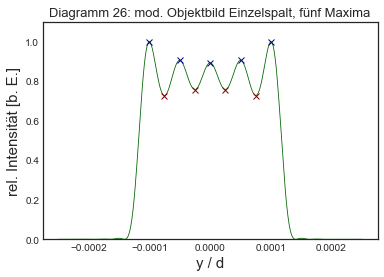

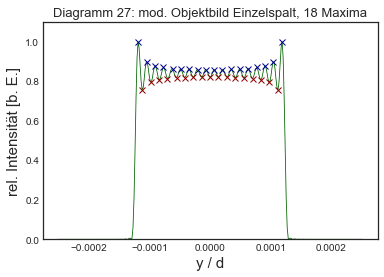

In [22]:
#Plotten der Einzelspaltbilder
maxPos_spalt1, maxInt_spalt1, minPos_spalt1, minInt_spalt1 = picture(spalt, 1, '22: mod. Objektbild Einzelspalt, ein Maximum','V233Diagramm22')
maxPos_spalt2, maxInt_spalt2, minPos_spalt2, minInt_spalt2 = picture(spalt, 2, '23: mod. Objektbild Einzelspalt, zwei Maxima','V233Diagramm23')
maxPos_spalt3, maxInt_spalt3, minPos_spalt3, minInt_spalt3 = picture(spalt, 3, '24: mod. Objektbild Einzelspalt, drei Maxima','V233Diagramm24')
maxPos_spalt4, maxInt_spalt4, minPos_spalt4, minInt_spalt4 = picture(spalt, 4, '25: mod. Objektbild Einzelspalt, vier Maxima','V233Diagramm25')
maxPos_spalt5, maxInt_spalt5, minPos_spalt5, minInt_spalt5 = picture(spalt, 5, '26: mod. Objektbild Einzelspalt, fünf Maxima','V233Diagramm26')
maxPos_spalt18, maxInt_spalt18, minPos_spalt18, minInt_spalt18 = picture(spalt, 18, '27: mod. Objektbild Einzelspalt, 18 Maxima','V233Diagramm27')

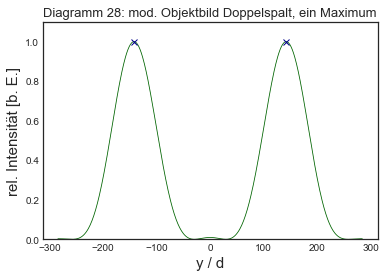

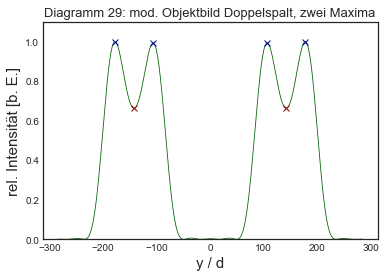

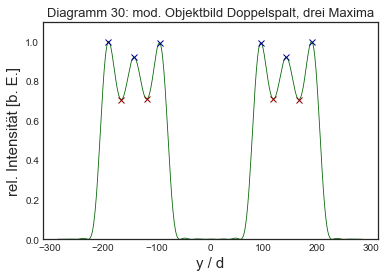

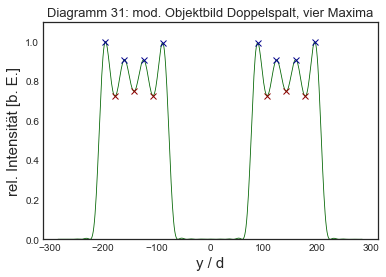

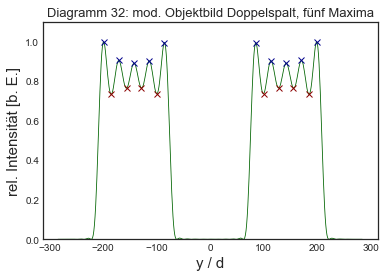

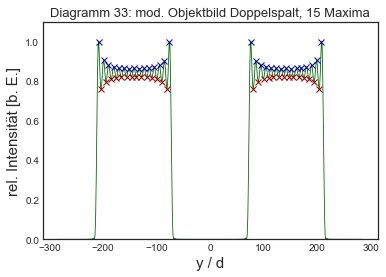

In [23]:
#Doppelspalt
d=width_mean
g=diff_mid

#Plotten der Doppelspaltbilder mit zuver berechnetem d und g
maxPos_dspalt1, maxInt_dspalt1, minPos_dspalt1, minInt_dspalt1 = picture(doppelspalt, 1, '28: mod. Objektbild Doppelspalt, ein Maximum','V233Diagramm28')
maxPos_dspalt2, maxInt_dspalt2, minPos_dspalt2, minInt_dspalt2 = picture(doppelspalt, 2, '29: mod. Objektbild Doppelspalt, zwei Maxima','V233Diagramm29')
maxPos_dspalt3, maxInt_dspalt3, minPos_dspalt3, minInt_dspalt3 = picture(doppelspalt, 3, '30: mod. Objektbild Doppelspalt, drei Maxima','V233Diagramm30')
maxPos_dspalt4, maxInt_dspalt4, minPos_dspalt4, minInt_dspalt4 = picture(doppelspalt, 4, '31: mod. Objektbild Doppelspalt, vier Maxima','V233Diagramm31')
maxPos_dspalt5, maxInt_dspalt5, minPos_dspalt5, minInt_dspalt5 = picture(doppelspalt, 5, '32: mod. Objektbild Doppelspalt, fünf Maxima','V233Diagramm32')
maxPos_dspalt15, maxInt_dspalt15, minPos_dspalt15, minInt_dspalt15 = picture(doppelspalt, 15, '33: mod. Objektbild Doppelspalt, 15 Maxima','V233Diagramm33')

### a) Bestimmung der Abstände der "wiggles" (Theorie und Experiment)

In [24]:
# Funktion zum Bestimmen der Extrema
def distance(pos):
    Pos = []
    if len(pos) < 2:
        True
    else:
        for i in range(len(pos) - 1):
            Pos.append(pos[i+1] - pos[i])
    return np.round(Pos, 1)

def distance_err(pos_err):
    Pos_err = []
    if len(pos_err) < 2:
        True
    else:
        for i in range(len(pos_err) - 1):
            Pos_err.append(np.sqrt(pos_err[i+1]**2 + pos_err[i]**2))
    return np.round(Pos_err, 1)

In [25]:
# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max = distance(maxPos_spalt1) 
dist_spalt2_max = distance(maxPos_spalt2) 
dist_spalt3_max = distance(maxPos_spalt3) 
dist_spalt18_max = distance(maxPos_spalt18)

dist_spalt1_min = distance(minPos_spalt1) 
dist_spalt2_min = distance(minPos_spalt2) 
dist_spalt3_min = distance(minPos_spalt3) 
dist_spalt18_min = distance(minPos_spalt18)

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_spalt1_ex = np.array([1247.19])
maxPos_spalt2_ex = np.array([1101, 1171])
maxPos_spalt3_ex = np.array([1090, 1138, 1183])
maxPos_spalt18_ex = np.array([1183.06,1191.27,1198.52,1205.92,1212.69,1219.93,1227.66,1235.39,1241.83,1249.72,1257.93,1264.69,1271.62,1279.51,1286.75,1294.00,1301.89,1310.26]) 

maxPos_spalt1_ex_err = np.array([3])
maxPos_spalt2_ex_err = np.array([3, 3])
maxPos_spalt3_ex_err = np.array([3, 3, 3])
maxPos_spalt18_ex_err = np.ones(18)

minPos_spalt1_ex = np.array([])
minPos_spalt2_ex = np.array([1246.34])
minPos_spalt3_ex = np.array([1222.29,1270.40])
minPos_spalt18_ex = np.array([1187.89,1194.97,1201.90,1209.47,1216.71,1223.96,1231.69,1238.13,1245.37,1253.75,1261.80,1268.40,1275.64,1283.21,1290.78,1297.86,1305.43])

minPos_spalt1_ex_err = np.array([])
minPos_spalt2_ex_err = np.array([3])
minPos_spalt3_ex_err = np.array([3, 3])
minPos_spalt18_ex_err = np.ones(17)

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max_ex = distance(maxPos_spalt1_ex) 
dist_spalt2_max_ex = distance(maxPos_spalt2_ex) 
dist_spalt3_max_ex = distance(maxPos_spalt3_ex)
dist_spalt18_max_ex = distance(maxPos_spalt18_ex)

dist_spalt1_max_ex_err = distance_err(maxPos_spalt1_ex_err) 
dist_spalt2_max_ex_err = distance_err(maxPos_spalt2_ex_err) 
dist_spalt3_max_ex_err = distance_err(maxPos_spalt3_ex_err)
dist_spalt18_max_ex_err = distance_err(maxPos_spalt18_ex_err)

dist_spalt1_min_ex = distance(minPos_spalt1_ex) 
dist_spalt2_min_ex = distance(minPos_spalt2_ex) 
dist_spalt3_min_ex = distance(minPos_spalt3_ex)
dist_spalt18_min_ex = distance(minPos_spalt18_ex)

dist_spalt1_min_ex_err = distance_err(minPos_spalt1_ex_err) 
dist_spalt2_min_ex_err = distance_err(minPos_spalt2_ex_err) 
dist_spalt3_min_ex_err = distance_err(minPos_spalt3_ex_err)
dist_spalt18_min_ex_err = distance_err(minPos_spalt18_ex_err)

In [26]:
#Theoretische Abstände der Maxima und Minima für den Doppelspalt, 15 Maxima
#dist_dspalt18_max = distance(maxPos_dspalt15[15:]) 
#dist_dspalt18_min = distance(minPos_dspalt15[15:]) 

# Bestimmen der theoretischen Abstände der Maxima und Minima
#dist_dspalt15_max_ex = distance(maxPos_dspalt15_ex)
#dist_dspalt15_max_ex_err = distance_err(maxPos_dspalt15_ex_err)

#dist_dspalt15_min_ex = distance(minPos_dspalt15_ex)
#dist_dspalt15_min_ex_err = distance_err(minPos_dspalt15_ex_err)

### Vergleich des Einzelspaltes

In [27]:
#direkt Umrechnung in mm durch Multiplikation mit 14micrometer*g
pxl_to_m=14e-6*9.123e-2
g_err=0.01e-2
print('Theoretische Abstände der Maxima:')
#print('ein Maximum:',dist_spalt1_max)
#print('zwei Maxima:',dist_spalt2_max)
#print('drei Maxima:',dist_spalt3_max)
print('18 Maxima:',dist_spalt18_max*pxl_to_m)
print()

print('Theoretische Abstände der Minima:')
#print('kein Minimum:',dist_spalt1_min)
#print('ein Minimum:',dist_spalt2_min)
#print('zwei Minima:',dist_spalt3_min)
print('17 Minima:',dist_spalt18_min*pxl_to_m)
print()

print('Experimentelle Abstände der Maxima:')
#print('ein Maximum:',dist_spalt1_max_ex)
#print('+-', dist_spalt1_max_ex_err)
#print('zwei Maxima:',dist_spalt2_max_ex)
#print('+-', dist_spalt2_max_ex_err)
#print('drei Maxima:',dist_spalt3_max_ex)
#print('+-', dist_spalt3_max_ex_err)
print('18 Maxima:',dist_spalt18_max_ex*pxl_to_m)
print('+-', dist_spalt18_max_ex_err*pxl_to_m )
print()

print('Experimentelle Abstände der Minima:')
#print('kein Minimum:',dist_spalt1_min_ex)
#print('+-', dist_spalt1_min_ex_err)
#print('ein Minimum:',dist_spalt2_min_ex)
#print('+-', dist_spalt2_min_ex_err)
#print('zwei Minima:',dist_spalt3_min_ex)
#print('+-', dist_spalt3_min_ex_err)
print('17 Minima:',dist_spalt18_min_ex*pxl_to_m)
print('+-',dist_spalt18_min_ex_err*pxl_to_m)

Theoretische Abstände der Maxima:
18 Maxima: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

Theoretische Abstände der Minima:
17 Minima: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

Experimentelle Abstände der Maxima:
18 Maxima: [  1.04732040e-05   9.19598400e-06   9.45142800e-06   8.68509600e-06
   9.19598400e-06   9.83459400e-06   9.83459400e-06   8.17420800e-06
   1.00900380e-05   1.04732040e-05   8.68509600e-06   8.81281800e-06
   1.00900380e-05   9.19598400e-06   9.19598400e-06   1.00900380e-05
   1.07286480e-05]
+- [  1.78810800e-06   1.78810800e-06   1.78810800e-06   1.78810800e-06
   1.78810800e-06   1.78810800e-06   1.78810800e-06   1.78810800e-06
   1.78810800e-06   1.78810800e-06   1.78810800e-06   1.78810800e-06
   1.78810800e-06   1.78810800e-06   1.78810800e-06   1.78810800e-06
   1.78810800e-06]

Experimentelle Abstände der Minima:
17 Minima: [  9.06826200e-06   8.81281800e-06   9.70687200e-06   9.19598400e-06
   9.19598400e-

### b) Vergleich der rel. Intensitäten der Extrema 

In [28]:
# erstes Bild als Eichmessung
I0_max_0=2971.51

ug0_mean=(233.64+228.58)/2
ug0_mean_err=np.sqrt(50) 
ug0_mean_std=np.std(np.array([233.64,228.58]))/np.sqrt(2)

I0_max_0_corr=I0_max_0-ug0_mean
I0_max_0_corr_err=np.sqrt(intensity_err**2+ug0_mean_err**2)
I0_max_0_corr_std=ug0_mean_std

#ab hier wird direkt der um den Untergrund abgezogene Wert angegeben. Berechnung analog wie zuvor.

# zweites Bild
max2_mean=2819.66-(209.27+205.63)/2
max2_mean_err=np.sqrt(2*ug0_mean_err**2)
max2_mean_std=np.sqrt((np.std(np.array([2809.80,2829.52])/np.sqrt(2))**2)+(np.std(np.array([209.27,205.63])/np.sqrt(2)))**2)

min2=1961.63-(209.27+205.63)/2
min2_err=np.sqrt(intensity_err**2+ug0_mean_err**2)
min2_std=np.std(np.array([209.27,205.63]))/np.sqrt(2)

# drittes Bild
max3_mean=(2752.25+2584.04+2691.76)/3-(210.36+207.89)/2
max3_mean_err=np.sqrt((300/9)**2+ug0_mean_err**2)
max3_mean_std=np.sqrt((np.std(np.array([2752.25,2584.04,2691.76])/np.sqrt(3))**2)+(np.std(np.array([210.36,207.89])/np.sqrt(2)))**2)

min3_mean=((2215.22+2088.24)-(210.36+207.89))/2
min3_mean_err=np.sqrt(2*ug0_mean_err**2)
min3_mean_std=np.sqrt((np.std(np.array([2215.22,2088.24])/np.sqrt(2))**2)+(np.std(np.array([210.36,207.89]))/np.sqrt(2))**2)

In [29]:
#Verhältnisse zu I0

I_rel_max2 = max2_mean/I0_max_0_corr
I_rel_max2_err = I_rel_max2*np.sqrt((max2_mean_err/max2_mean)**2+(I0_max_0_corr_err/I0_max_0_corr)**2)
I_rel_max2_std = I_rel_max2*np.sqrt((max2_mean_std/max2_mean)**2+(I0_max_0_corr_std/I0_max_0_corr)**2)
I_rel_min2 = min2/I0_max_0_corr
I_rel_min2_err = I_rel_min2*np.sqrt((min2_err/min2)**2+(I0_max_0_corr_err/I0_max_0_corr)**2)
I_rel_min2_std = I_rel_min2*np.sqrt((min2_std/min2)**2+(I0_max_0_corr_std/I0_max_0_corr)**2)

I_rel_max3 = max3_mean/I0_max_0_corr
I_rel_max3_err = I_rel_max3*np.sqrt((max3_mean_err/max3_mean)**2+(I0_max_0_corr_err/I0_max_0_corr)**2)
I_rel_max3_std = I_rel_max3*np.sqrt((max3_mean_std/max3_mean)**2+(I0_max_0_corr_std/I0_max_0_corr)**2)
I_rel_min3 = min3_mean/I0_max_0_corr
I_rel_min3_err = I_rel_min3*np.sqrt((min3_mean_err/min3_mean)**2+(I0_max_0_corr_err/I0_max_0_corr)**2)
I_rel_min3_std = I_rel_min3*np.sqrt((min3_mean_std/min3_mean)**2+(I0_max_0_corr_std/I0_max_0_corr)**2)

print('Die rel. Intensitätsverhältnisse der Extrema ergeben sich zu:')
print('Zweites Bild, Maxima: '+str(I_rel_max2)+ ' +/- '+str(I_rel_max2_err)+' +/- '+str(I_rel_max2_std) )
print('Zweites Bild, Minima: '+str(I_rel_min2)+ ' +/- '+str(I_rel_min2_err)+' +/- '+str(I_rel_min2_std) )
print()
print('Drittes Bild, Maxima: '+str(I_rel_max3)+ ' +/- '+str(I_rel_max3_err)+' +/- '+str(I_rel_max3_std) )
print('Drittes Bild, Minima: '+str(I_rel_min3)+ ' +/- '+str(I_rel_min3_err)+' +/- '+str(I_rel_min3_std) )

Die rel. Intensitätsverhältnisse der Extrema ergeben sich zu:
Zweites Bild, Maxima: 0.953222157349292 +/- 0.00560935840463 +/- 0.00266094464925
Zweites Bild, Minima: 0.6401182309151948 +/- 0.00530643599435 +/- 0.000628619568222

Drittes Bild, Maxima: 0.9001940106067241 +/- 0.0130690015453 +/- 0.0146718751514
Drittes Bild, Minima: 0.7088764413954165 +/- 0.00483248997874 +/- 0.0163919890199


## Teil 4: Fourierbild des Doppelspaltes

### Fall a): Bestimmung von N

In [30]:
#Berechnung von n
n_max_a=1/prob_gd
n_max_a_err=n_max_a*prob_gd_err/prob_gd
print('Fall a) ist erfüllt für n = ',n_max_a)

Fall a) ist erfüllt für n =  0.425934250352


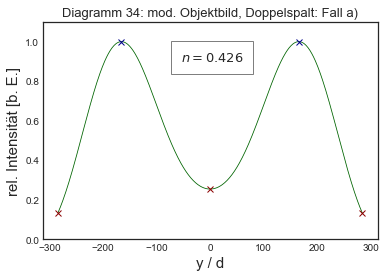

In [31]:
#Plot der bereits zuvor programmierten Doppelspaltfunktion mit passendem n.

maxPos_dspalt0, maxInt_dspalt0, minPos_dspalt0, minInt_dspalt0 = picture(doppelspalt, n_max_a, '34: mod. Objektbild, Doppelspalt: Fall a)','V233Diagramm34_ohneText')
plt.text(-55,0.9,'$n = 0.426$',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=13)
plt.savefig('Diagramme/V233Diagramm34.pdf', format='PDF')

### Fall b): iterative Bestimmung von k_y

In [32]:
#Spaltfunktion definieren
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2) *np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

#Doppelspalt
d=1
g=prob_gd*d

In [38]:
x1 = [1,2]
k_y = 2*np.pi*1/g
Y = np.linspace(-d,d,501)
#k_y stets verkleinern und Maxima zählen. Wenn nur noch ein Maximum da ist, dann k_y ausgeben
while len(x1)>1:
    k_y=k_y-0.001
    f_modifiziert=[]
    for i in range(len(Y)):
        y=Y[i]
        result, error = quad(doppelspalt, 0, k_y)
        f_modifiziert.append(result**2)
    C =np.max(f_modifiziert)
    f_modifiziert/=C
    max_mask = np.r_[f_modifiziert[1:] < f_modifiziert[:-1], True] & np.r_[True,f_modifiziert[:-1] < f_modifiziert[1:]];
    x1=Y[np.where(max_mask)]
print(k_y)

1.78922382364


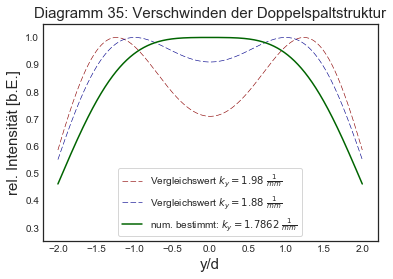

In [39]:
#numerisch berechnet, Berechung recht aufwendig bei gewählter Schrittweite
#bei anderen Werten einfach vorheriges Codefeld ausführen

k_y=1.78622382364
#Vergleichswerte
k_y2=1.88
k_y3=1.98

Y = np.linspace(-2,2,10001)*d

#für dieses k_y und zwei Vergleichswerte das Objektbild plotten
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y)
    f_modifiziert.append(result**2)
C =np.max(f_modifiziert)
f_modifiziert/=C

f_modifiziert2=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y2)
    f_modifiziert2.append(result**2)
C =np.max(f_modifiziert2)
f_modifiziert2/=C

f_modifiziert3=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y3)
    f_modifiziert3.append(result**2)
C =np.max(f_modifiziert3)
f_modifiziert3/=C

plt.plot(Y, f_modifiziert3,color='darkred',linestyle='--',linewidth=0.6,label=r'Vergleichswert $k_y=1.98 \ \frac{1}{mm}$')
plt.plot(Y, f_modifiziert2,color='darkblue',linestyle='--',linewidth=0.6,label=r'Vergleichswert $k_y=1.88 \ \frac{1}{mm}$')
plt.plot(Y, f_modifiziert,color='darkgreen',label=r'num. bestimmt: $k_y=1.7862 \ \frac{1}{mm}$')
plt.title('Diagramm 35: Verschwinden der Doppelspaltstruktur',size=15)
plt.xlabel('y/d',size=15)
plt.ylabel('rel. Intensität [b.E.]', size=15)
plt.ylim(0.25,1.05)
plt.legend(frameon=True)
plt.savefig('Diagramme/V233Diagramm35.pdf',format='PDF')

In [40]:
ky_exp=np.pi*0.46e-3/(wavelength*f1)*1e-3
ky_exp_err=ky_exp*(0.04/0.46)

print('Das experimentelle Ergebnis berechnet sich zu:')
print('k_y = '+ str(ky_exp)+' +/- '+ str(ky_exp_err)+ ' 1/mm')


Das experimentelle Ergebnis berechnet sich zu:
k_y = 28.447492532506004 +/- 2.473695002826609 1/mm


In [43]:
#für Fall a)
d_a=0.12e-3
d_a_err=0.04e-3

ky_theo_a = 2*np.pi*n_max_a/g
ky_theo_a_err = ky_theo_a *np.sqrt((n_max_a_err/n_max_a)**2+(prob_gd_err/g)**2)

ky_exp_a=np.pi*0.12e-3/(wavelength*f1)*1e-3
ky_exp_a_err=ky_exp_a*np.sqrt((0.04/0.12)**2)

print('Für den ersten Fall erhalten wir:')
print('ky_theo = '+str(ky_theo_a)+' +/- '+str(ky_theo_a_err))
print('ky_exp = '+str(ky_exp_a)+' +/- '+str(ky_exp_a_err))

Für den ersten Fall erhalten wir:
ky_theo = 1.1398953881 +/- 0.0369843209923
ky_exp = 7.421085008479827 +/- 2.47369500283
